In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import datetime
import glob

In [2]:
def file_list(folder):
    files = glob.glob(folder)
    sample_names =[]
    for file in files:
        sample_names.append(file[:])
    
    return sample_names

sample_name1 = file_list("./data/2ko/drive/*.csv")
sample_name2 = file_list("./data/2ko/FOV/*.csv")

print(sample_name1)
print(sample_name2)

i, j = 4,4

['./data/2ko/drive\\2022-11-02-20-12-02_3v58.csv', './data/2ko/drive\\2022-11-04-17-04-29_3v58.csv', './data/2ko/drive\\2022-11-04-17-15-15_3v58.csv', './data/2ko/drive\\2022-11-22-15-45-23_V62010508.csv', './data/2ko/drive\\2022-12-01-14-25-17_VT2030408.csv']
['./data/2ko/FOV\\2022-11-02-20-54-15_FOV_3v58.csv', './data/2ko/FOV\\2022-11-04-17-04-38_FOV_3v58.csv', './data/2ko/FOV\\2022-11-04-17-15-30_FOV_3v58.csv', './data/2ko/FOV\\2022-11-22-15-45-15_FOV_V52010508.csv', './data/2ko/FOV\\2022-12-01-14-30-50_FOV_VT2030408.csv']


In [3]:
# file
file_drive = sample_name1[i]
df1 = pd.read_csv(file_drive, index_col=0)
sample_name = file_drive[-28:-4]
print(sample_name)
df1.head()

12-01-14-25-17_VT2030408


,Time,humidity,temperature,vpp_sum1,vpp_sum2,delay_slow,delay_fast,delay_pp_slow,delay_pp_fast,Ch1_word,Ch2_word,Ch1_Amp,Ch2_Amp
0,2022/12/01 14:25:20,32.577515,26.825409,424884.0,753180.0,3720.938467,1751.980376,0.0,0.0,3.246133e+15,1.618389e+15,13.4,13.5
1,2022/12/01 14:25:22,32.546997,26.825409,426778.0,758166.0,3740.836741,1726.286425,0.0,0.0,3.246134e+15,1.618390e+15,13.4,13.5
2,2022/12/01 14:25:23,32.508850,26.814728,427955.0,752861.0,3745.722835,1726.497353,0.0,0.0,3.246134e+15,1.618389e+15,13.4,13.5
3,2022/12/01 14:25:25,32.489014,26.825409,426564.0,751683.0,3746.254962,1727.396459,0.0,0.0,3.246133e+15,1.618389e+15,13.4,13.5
4,2022/12/01 14:25:27,32.496643,26.862793,426891.0,753544.0,3747.347815,1725.812968,0.0,0.0,3.246132e+15,1.618389e+15,13.4,13.5


In [4]:
# file
file_drive =  sample_name2[j]
df2 = pd.read_csv(file_drive, index_col=0)
df2.head()

,Time,-x,+x,2x,-y,+y,2y
0,2022/12/01 14:25:51,-27.873524,28.655129,56.528653,-17.841096,18.91851,36.759606
1,2022/12/01 14:25:52,-27.873524,28.611946,56.485470,-17.841096,18.91851,36.759606
2,2022/12/01 14:25:53,-27.873524,28.655129,56.528653,-17.841096,18.91851,36.759606
3,2022/12/01 14:25:54,-27.873524,28.655129,56.528653,-17.841096,18.91851,36.759606
4,2022/12/01 14:25:55,-27.873524,28.655129,56.528653,-17.841096,18.91851,36.759606


In [5]:
time1 = pd.to_datetime(df1["Time"]) 
time1 = time1.dt.round("s")

time2 = pd.to_datetime(df2["Time"]) 
time2 = time2.dt.round("s")

time1[len(time1)-1]

Timestamp('2022-12-01 14:31:16')

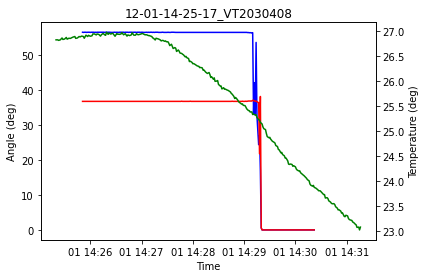

In [6]:
fig, ax1 = plt.subplots()
ax2 = ax1.twinx()

ax1.set_xlabel("Time")
ax1.set_ylabel("Angle (deg)")
ax2.set_ylabel("Temperature (deg)")
plt.title(sample_name)

xmin = time1[0]
xmax =time1[len(time1)-1]

#plt.xlim([xmin,xmax])
ax1.set_xticks([xmin, xmax]) 
ax1.set_xticklabels([xmin.time(), xmax.time()])
#ax1.set_ylim(0,60)
#ax2.set_ylim(10,40)

ax1.plot(time2, df2["2x"], color='b')
ax1.plot(time2, df2["2y"], color='r')
ax2.plot(time1, df1["temperature"], color='g')

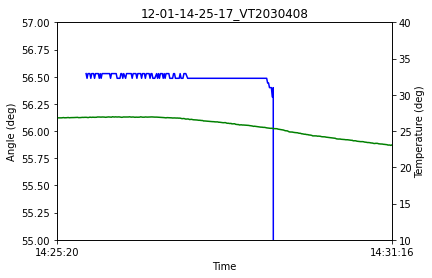

In [7]:
fig, ax1 = plt.subplots()
ax2 = ax1.twinx()

ax1.set_xlabel("Time")
ax1.set_ylabel("Angle (deg)")
ax2.set_ylabel("Temperature (deg)")
plt.title(sample_name)

xmin = time1[0]
xmax =time1[len(time1)-1]

plt.xlim([xmin,xmax])
ax1.set_xticks([xmin, xmax]) 
ax1.set_xticklabels([xmin.time(), xmax.time()])
ax1.set_ylim(55,57)
ax2.set_ylim(10,40)

ax1.plot(time2, df2["2x"], color='b')
ax1.plot(time2, df2["2y"], color='r')
ax2.plot(time1, df1["temperature"], color='g')

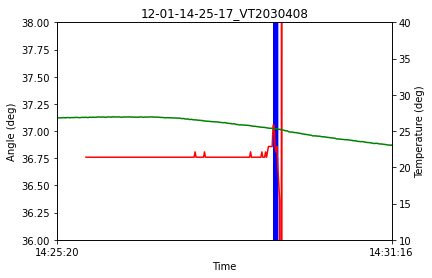

In [8]:
fig, ax1 = plt.subplots()
ax2 = ax1.twinx()

ax1.set_xlabel("Time")
ax1.set_ylabel("Angle (deg)")
ax2.set_ylabel("Temperature (deg)")
plt.title(sample_name)

xmin = time1[0]
xmax =time1[len(time1)-1]

plt.xlim([xmin,xmax])
ax1.set_xticks([xmin, xmax]) 
ax1.set_xticklabels([xmin.time(), xmax.time()])
ax1.set_ylim(36,38)
ax2.set_ylim(10,40)

ax1.plot(time2, df2["2x"], color='b')
ax1.plot(time2, df2["2y"], color='r')
ax2.plot(time1, df1["temperature"], color='g')

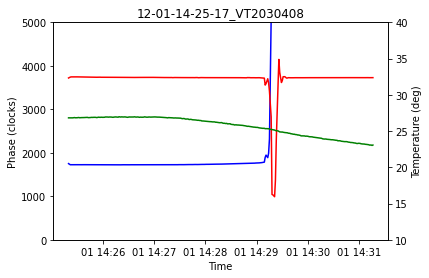

In [9]:
fig, ax1 = plt.subplots()
ax2 = ax1.twinx()

ax1.set_xlabel("Time")
ax1.set_ylabel("Phase (clocks)")
ax2.set_ylabel("Temperature (deg)")
plt.title(sample_name)

xmin = time1[0]
xmax =time1[len(time1)-1]
#plt.xlim([xmin,xmax])

ax1.set_xticks([xmin, xmax]) 
ax1.set_xticklabels([xmin.time(), xmax.time()])
ax1.set_ylim(0,5000)
ax2.set_ylim(10,40)

ax1.plot(time1, df1["delay_fast"], color='b')
ax1.plot(time1, df1["delay_slow"], color='r')
ax2.plot(time1, df1["temperature"], color='g')

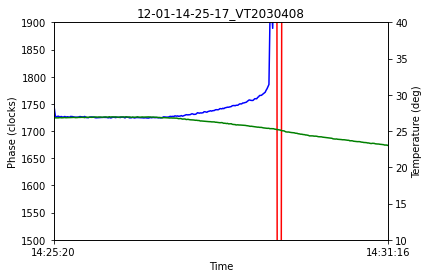

In [10]:
fig, ax1 = plt.subplots()
ax2 = ax1.twinx()

ax1.set_xlabel("Time")
ax1.set_ylabel("Phase (clocks)")
ax2.set_ylabel("Temperature (deg)")
plt.title(sample_name)

xmin = time1[0]
xmax =time1[len(time1)-1]

plt.xlim([xmin,xmax])
ax1.set_xticks([xmin, xmax]) 
ax1.set_xticklabels([xmin.time(), xmax.time()])
ax1.set_ylim(1500,1900)
ax2.set_ylim(10,40)

ax1.plot(time1, df1["delay_fast"], color='b')
ax1.plot(time1, df1["delay_slow"], color='r')
ax2.plot(time1, df1["temperature"], color='g')

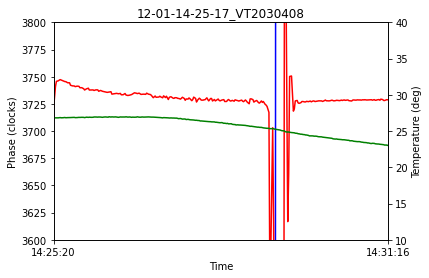

In [17]:
fig, ax1 = plt.subplots()
ax2 = ax1.twinx()

ax1.set_xlabel("Time")
ax1.set_ylabel("Phase (clocks)")
ax2.set_ylabel("Temperature (deg)")
plt.title(sample_name)

xmin = time1[0]
xmax =time1[len(time1)-1]

plt.xlim([xmin,xmax])
ax1.set_xticks([xmin, xmax]) 
ax1.set_xticklabels([xmin.time(), xmax.time()])
ax1.set_ylim(3600,3800)
ax2.set_ylim(10,40)

ax1.plot(time1, df1["delay_fast"], color='b')
ax1.plot(time1, df1["delay_slow"], color='r')
ax2.plot(time1, df1["temperature"], color='g')

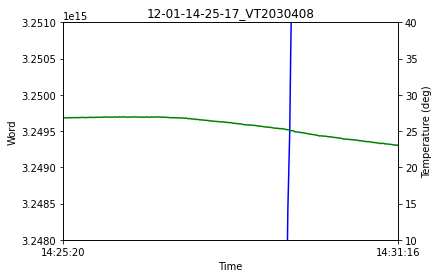

In [12]:
fig, ax1 = plt.subplots()
ax2 = ax1.twinx()

ax1.set_xlabel("Time")
ax1.set_ylabel("Word")
ax2.set_ylabel("Temperature (deg)")
plt.title(sample_name)

xmin = time1[0]
xmax =time1[len(time1)-1]

plt.xlim([xmin,xmax])
ax1.set_xticks([xmin, xmax]) 
ax1.set_xticklabels([xmin.time(), xmax.time()])
ax1.set_ylim(3.248e15,3.251e15)
ax2.set_ylim(10,40)

ax1.plot(time1, df1["Ch1_word"], color='b')
ax1.plot(time1, df1["Ch2_word"], color='r')
ax2.plot(time1, df1["temperature"], color='g')

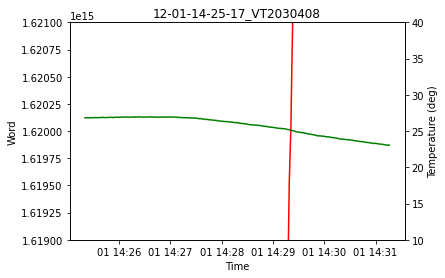

In [13]:
fig, ax1 = plt.subplots()
ax2 = ax1.twinx()

ax1.set_xlabel("Time")
ax1.set_ylabel("Word")
ax2.set_ylabel("Temperature (deg)")
plt.title(sample_name)

xmin = time1[0]
xmax =time1[len(time1)-1]

#plt.xlim([xmin,xmax])
ax1.set_xticks([xmin, xmax]) 
ax1.set_xticklabels([xmin.time(), xmax.time()])
ax1.set_ylim(1.619e15,1.621e15)
ax2.set_ylim(10,40)

#ax1.plot(time1, df1["Ch1_word"], color='b')
ax1.plot(time1, df1["Ch2_word"], color='r')
ax2.plot(time1, df1["temperature"], color='g')

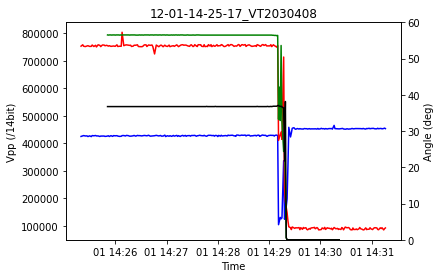

In [14]:
fig, ax1 = plt.subplots()
ax2 = ax1.twinx()

ax1.set_xlabel("Time")
ax1.set_ylabel("Vpp (/14bit)")
ax2.set_ylabel("Angle (deg)")
plt.title(sample_name)

xmin = time1[0]
xmax =time1[len(time1)-1]
#plt.xlim([xmin,xmax])

ax1.set_xticks([xmin, xmax]) 
ax1.set_xticklabels([xmin.time(), xmax.time()])
#ax1.set_ylim(0,5000)
ax2.set_ylim(0,60)

ax1.plot(time1, df1["vpp_sum1"], color='b')
ax1.plot(time1, df1["vpp_sum2"], color='r')
ax2.plot(time2, df2["2x"], color='g')
ax2.plot(time2, df2["2y"], color='k')